In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import MinMaxScaler #for standardization
import plotly.express as px
import scipy.stats as st
from termcolor import colored
from sklearn.decomposition import PCA

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


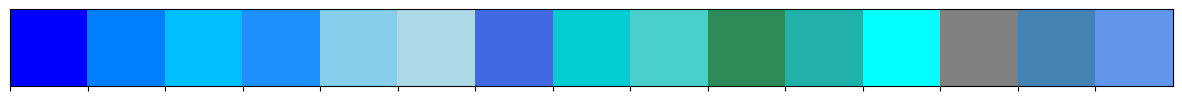

In [5]:

# COLORS USED IN NOTEBOOK ARE SELECTED HERE.

blue_shades = [
    "#0000FF",  # Classic Blue (Very Dark Blue)
    "#007FFF",  # Azure (Bright Sky Blue)
    "#00BFFF",  # Deep Sky Blue (Lighter than Azure)
    "#1E90FF",  # Sky Blue (Lighter than Deep Sky Blue)
    "#87CEEB",  # Light Sky Blue (Even Lighter Blue)
    "#ADD8E6",  # Pale Blue (Very Light Blue)
    "#4169E1",  # Royal Blue (Dark Saturated Blue)
    "#00CED1",  # Dark Turquoise (Blue with a hint of Green)
    "#48D1CC",  # Medium Turquoise (Lighter than Dark Turquoise)
    "#2E8B57",  # Sea Green (Blue with a prominent Green hue)
    "#20B2AA",  # Light Sea Green (Lighter than Sea Green)
    "#00FFFF",  # Cyan (Aqua Blue)
    "#808080",  # Gray (Neutral shade, can be perceived as a blue-ish gray)
    "#4682B4",  # Steel Blue (Dark Gray with a blue tint)
    "#6495ED",  # Cornflower Blue (Medium Saturated Blue)
]

sns.palplot (blue_shades, size = 1)  

In [3]:
wine = pd.read_csv("/Users/rishabhsharma/Desktop/DataScience_Projects/winequality-red.csv")

df = wine.copy()
df.head(n = 25).style.background_gradient(cmap ="Blues_r") 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
df.describe().T.style.background_gradient(cmap = "magma" )

# This code snippet performs a descriptive statistical summary on a DataFrame df and then enhances the visual presentation of the summary using a color gradient.



,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [101]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)


df.head(n=25)

# This code snippet renames several columns in the DataFrame df to ensure consistency and ease of access. 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


[Text(0.5, 1.0, 'Distribution of Citric_acid')]

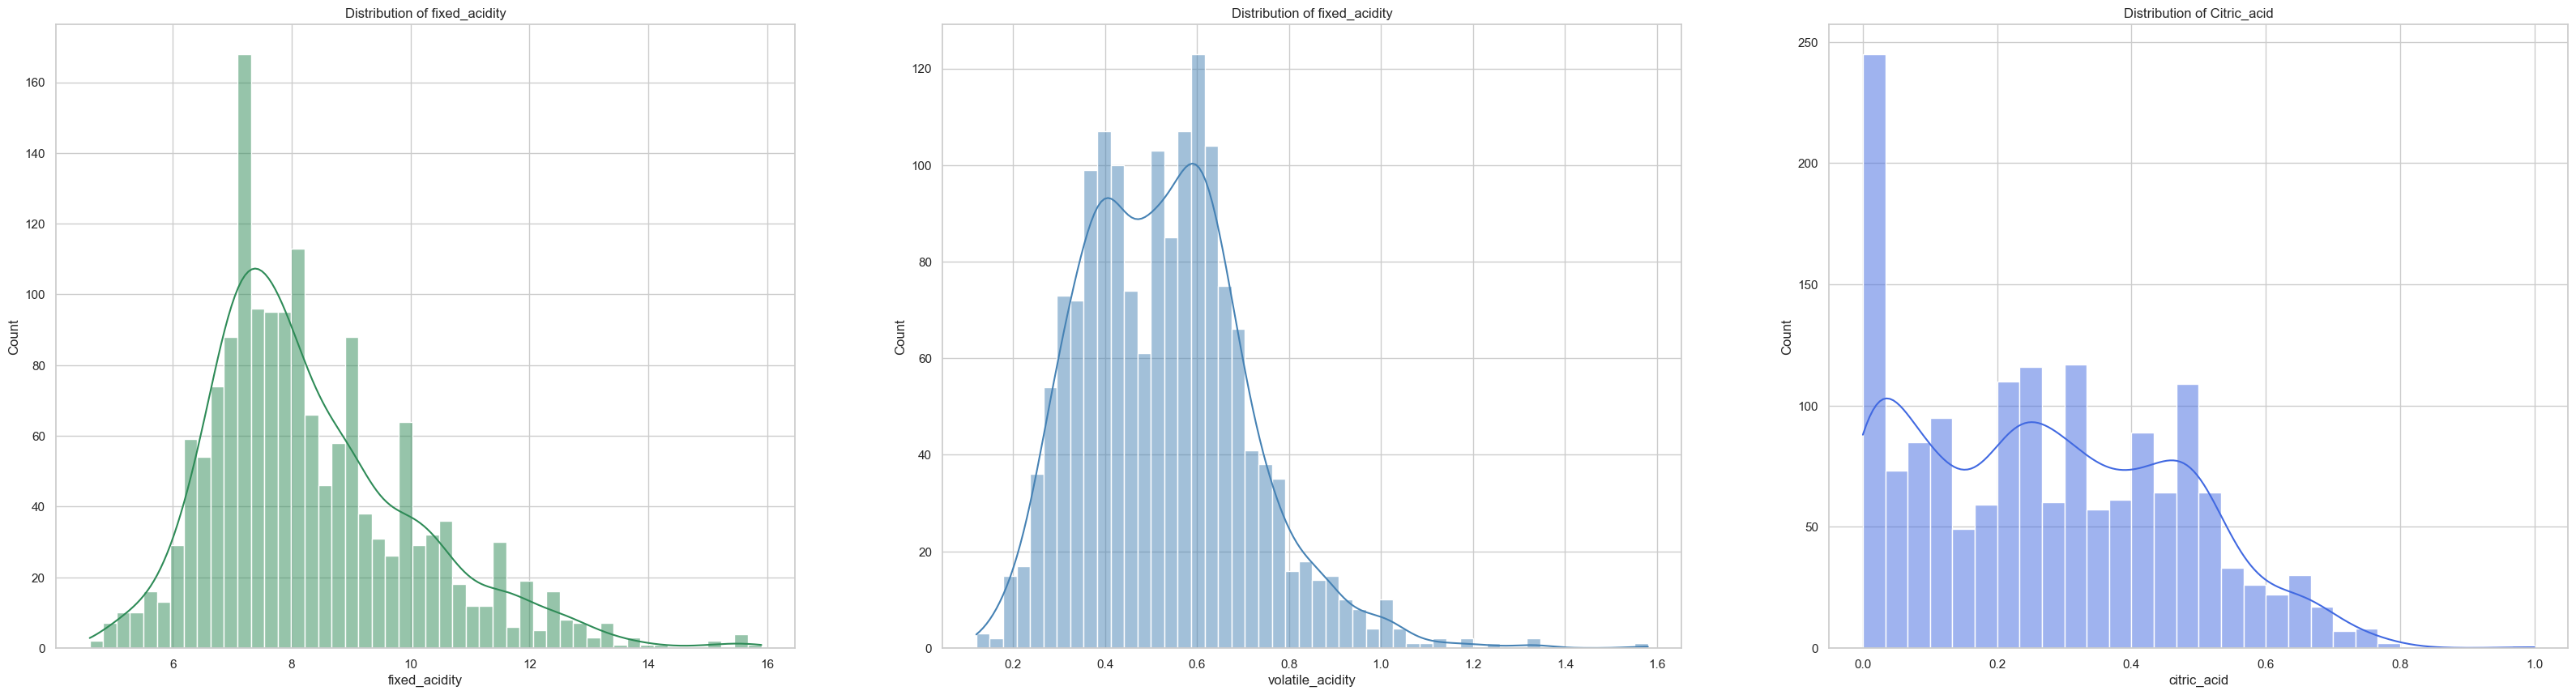

In [102]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10 ))
sns.histplot(ax = axes[0], x = df["fixed_acidity"],
          bins = 50,
          kde = True,
          cbar = True,
          color = "#2E8B57").set(title = "Distribution of fixed_acidity");

sns.histplot(ax = axes[1], x = df["volatile_acidity"],
          bins = 50,
          kde = True,
          cbar = True,
          color = "#4682B4").set(title = "Distribution of fixed_acidity");

sns.histplot(ax = axes[2], x = df["citric_acid"],
             bins = 30,
             kde = True,
             cbar = True,
             color = "#4169E1").set(title = "Distribution of Citric_acid")

# This code snippet creates a set of histograms to visualize the distributions of three different columns in the DataFrame
# df: fixed_acidity, volatile_acidity, and citric_acid. It uses Seaborn to plot these histograms side-by-side in a single figure.


[Text(0.5, 1.0, 'Distribution of Chrlorides')]

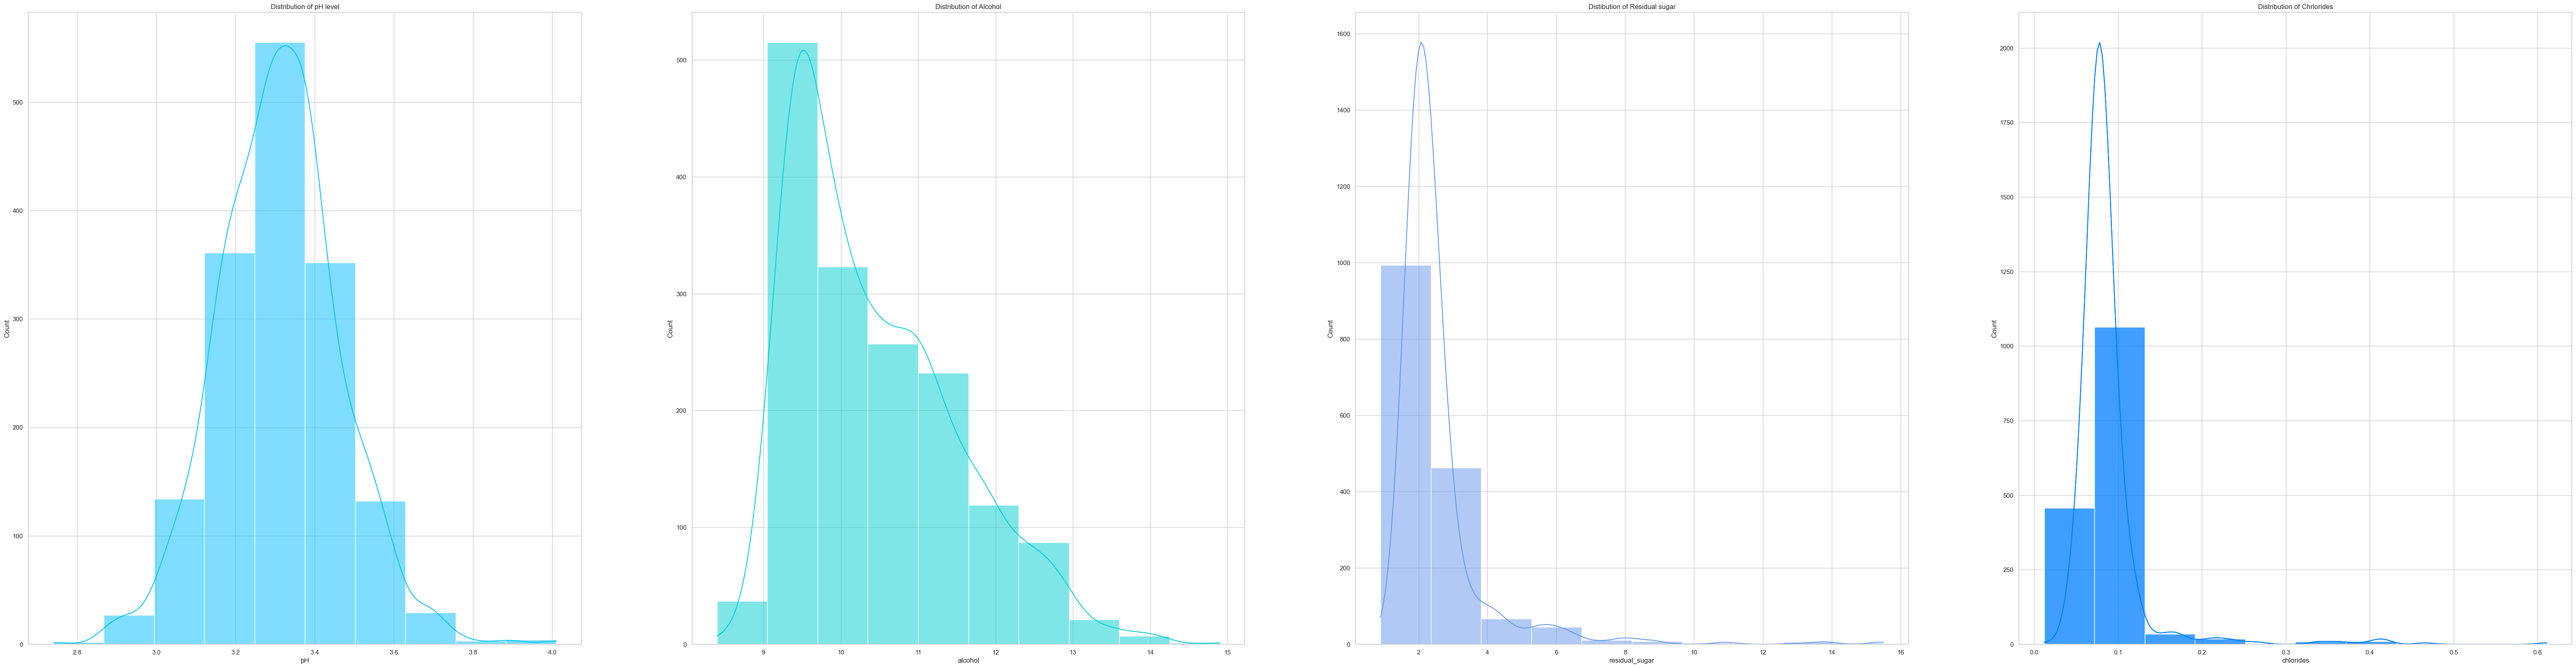

In [103]:
fig, axes = plt.subplots(1,4,figsize = (80,20))

sns.histplot(ax = axes[0], x = df["pH"],
            bins = 10,
            kde = True,
            cbar = True,
            color = "#00BFFF").set(title = "Distribution of pH level")

sns.histplot(ax = axes[1], x = df["alcohol"],
            bins = 10, 
            kde = True,
            cbar = True,
            color = "#00CED1").set(title = "Distribution of Alcohol")

sns.histplot(ax = axes[2], x = df["residual_sugar"],
            bins = 10,
            kde= True,
            cbar = True,
            color = "#6495ED").set(title = "Distibution of Residual sugar")

sns.histplot(ax = axes[3], x = df["chlorides"],
            bins = 10, 
            kde = True,
            cbar = True,
            color = "#007FFF").set (title = "Distribution of Chrlorides")

sns.histplot(ax = axes[3], x = df["chlorides"],
            bins = 10, 
            kde = True,
            cbar = True,
            color = "#007FFF").set (title = "Distribution of Chrlorides")

# This code snippet creates a set of histograms to visualize the distributions of five different columns in the DataFrame
# df: pH, alcohol, residual_sugar, and chlorides. It uses Seaborn to plot these histograms side-by-side in a single figure.


In [1]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True);
# This code snippet uses Seaborn's pairplot function to create a grid of scatter plots and histograms, 
# visualizing pairwise relationships between variables in the DataFrame df. 
# The plots are color-coded based on the quality column.

NameError: name 'sns' is not defined

[Text(0.5, 1.0, 'Relationship between fixed_acidity and quality')]

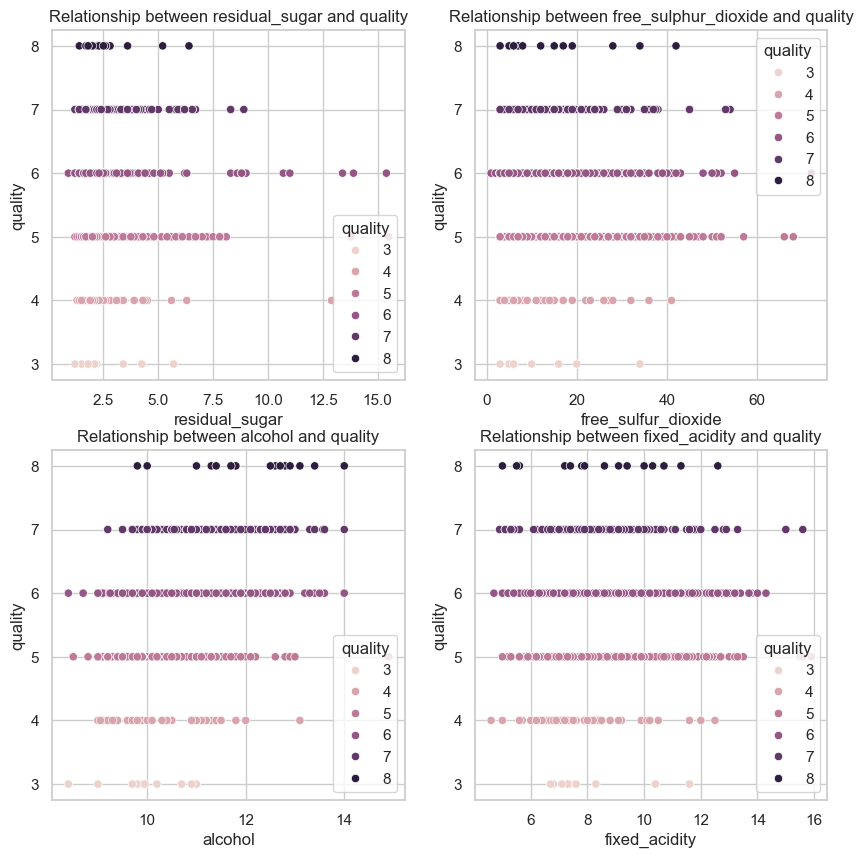

In [105]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

axes = axes.flatten()

sns.scatterplot(ax = axes[0],
               x= "residual_sugar",
               y = "quality", 
               hue = "quality",
               data = df,
               color = "#00BFFF"
              ).set(title = "Relationship between residual_sugar and quality")

sns.scatterplot(ax = axes[1],
               x= "free_sulfur_dioxide",
               y= "quality",
               hue= "quality",
               data = df,
               color = "#20B2AA").set(title = "Relationship between free_sulphur_dioxide and quality")

sns.scatterplot(ax = axes[2],
               x= "alcohol",
               y = "quality",
               hue = "quality",
               data = df,
               color = "#6495ED").set(title = "Relationship between alcohol and quality" )

sns.scatterplot(ax = axes[3],
               x = "fixed_acidity",
               y = "quality",
               hue = "quality",
               data = df,
               color = "##4169E1").set(title = "Relationship between fixed_acidity and quality")

# This code snippet creates a grid of scatter plots to visualize the relationships between different features of the DataFrame df and the quality variable. 
# Each scatter plot is color-coded based on the quality values.

[Text(0.5, 1.0, 'Relationship between residual_sugar and pH with respect Quality')]

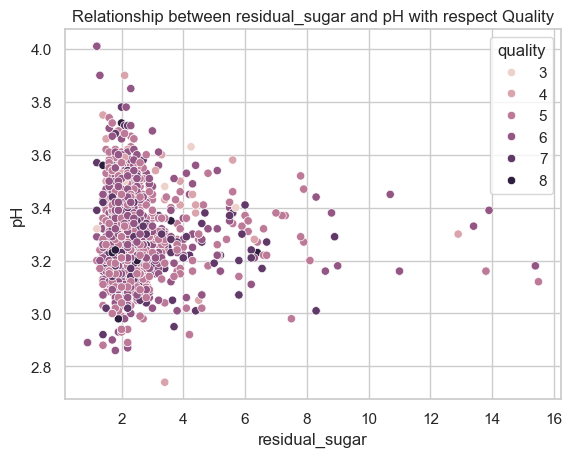

In [106]:
sns.scatterplot(
               x= "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df ).set(title = "Relationship between residual_sugar and pH with respect to Quality")

[Text(0.5, 1.0, 'Relationship between alcohol and pH')]

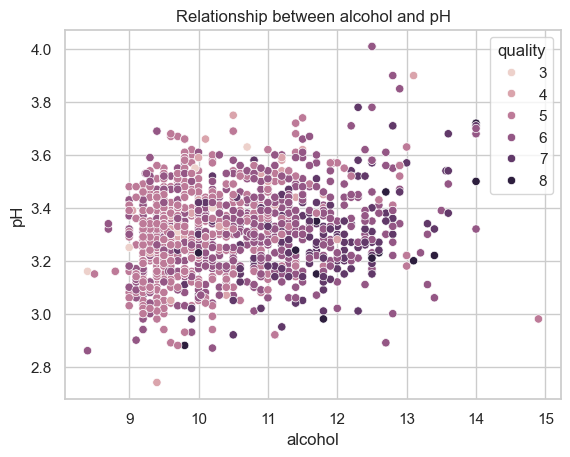

In [107]:
sns.scatterplot(x = "alcohol",
               y="pH",
               hue = "quality",
               data =df).set(title = "Relationship between alcohol and pH")

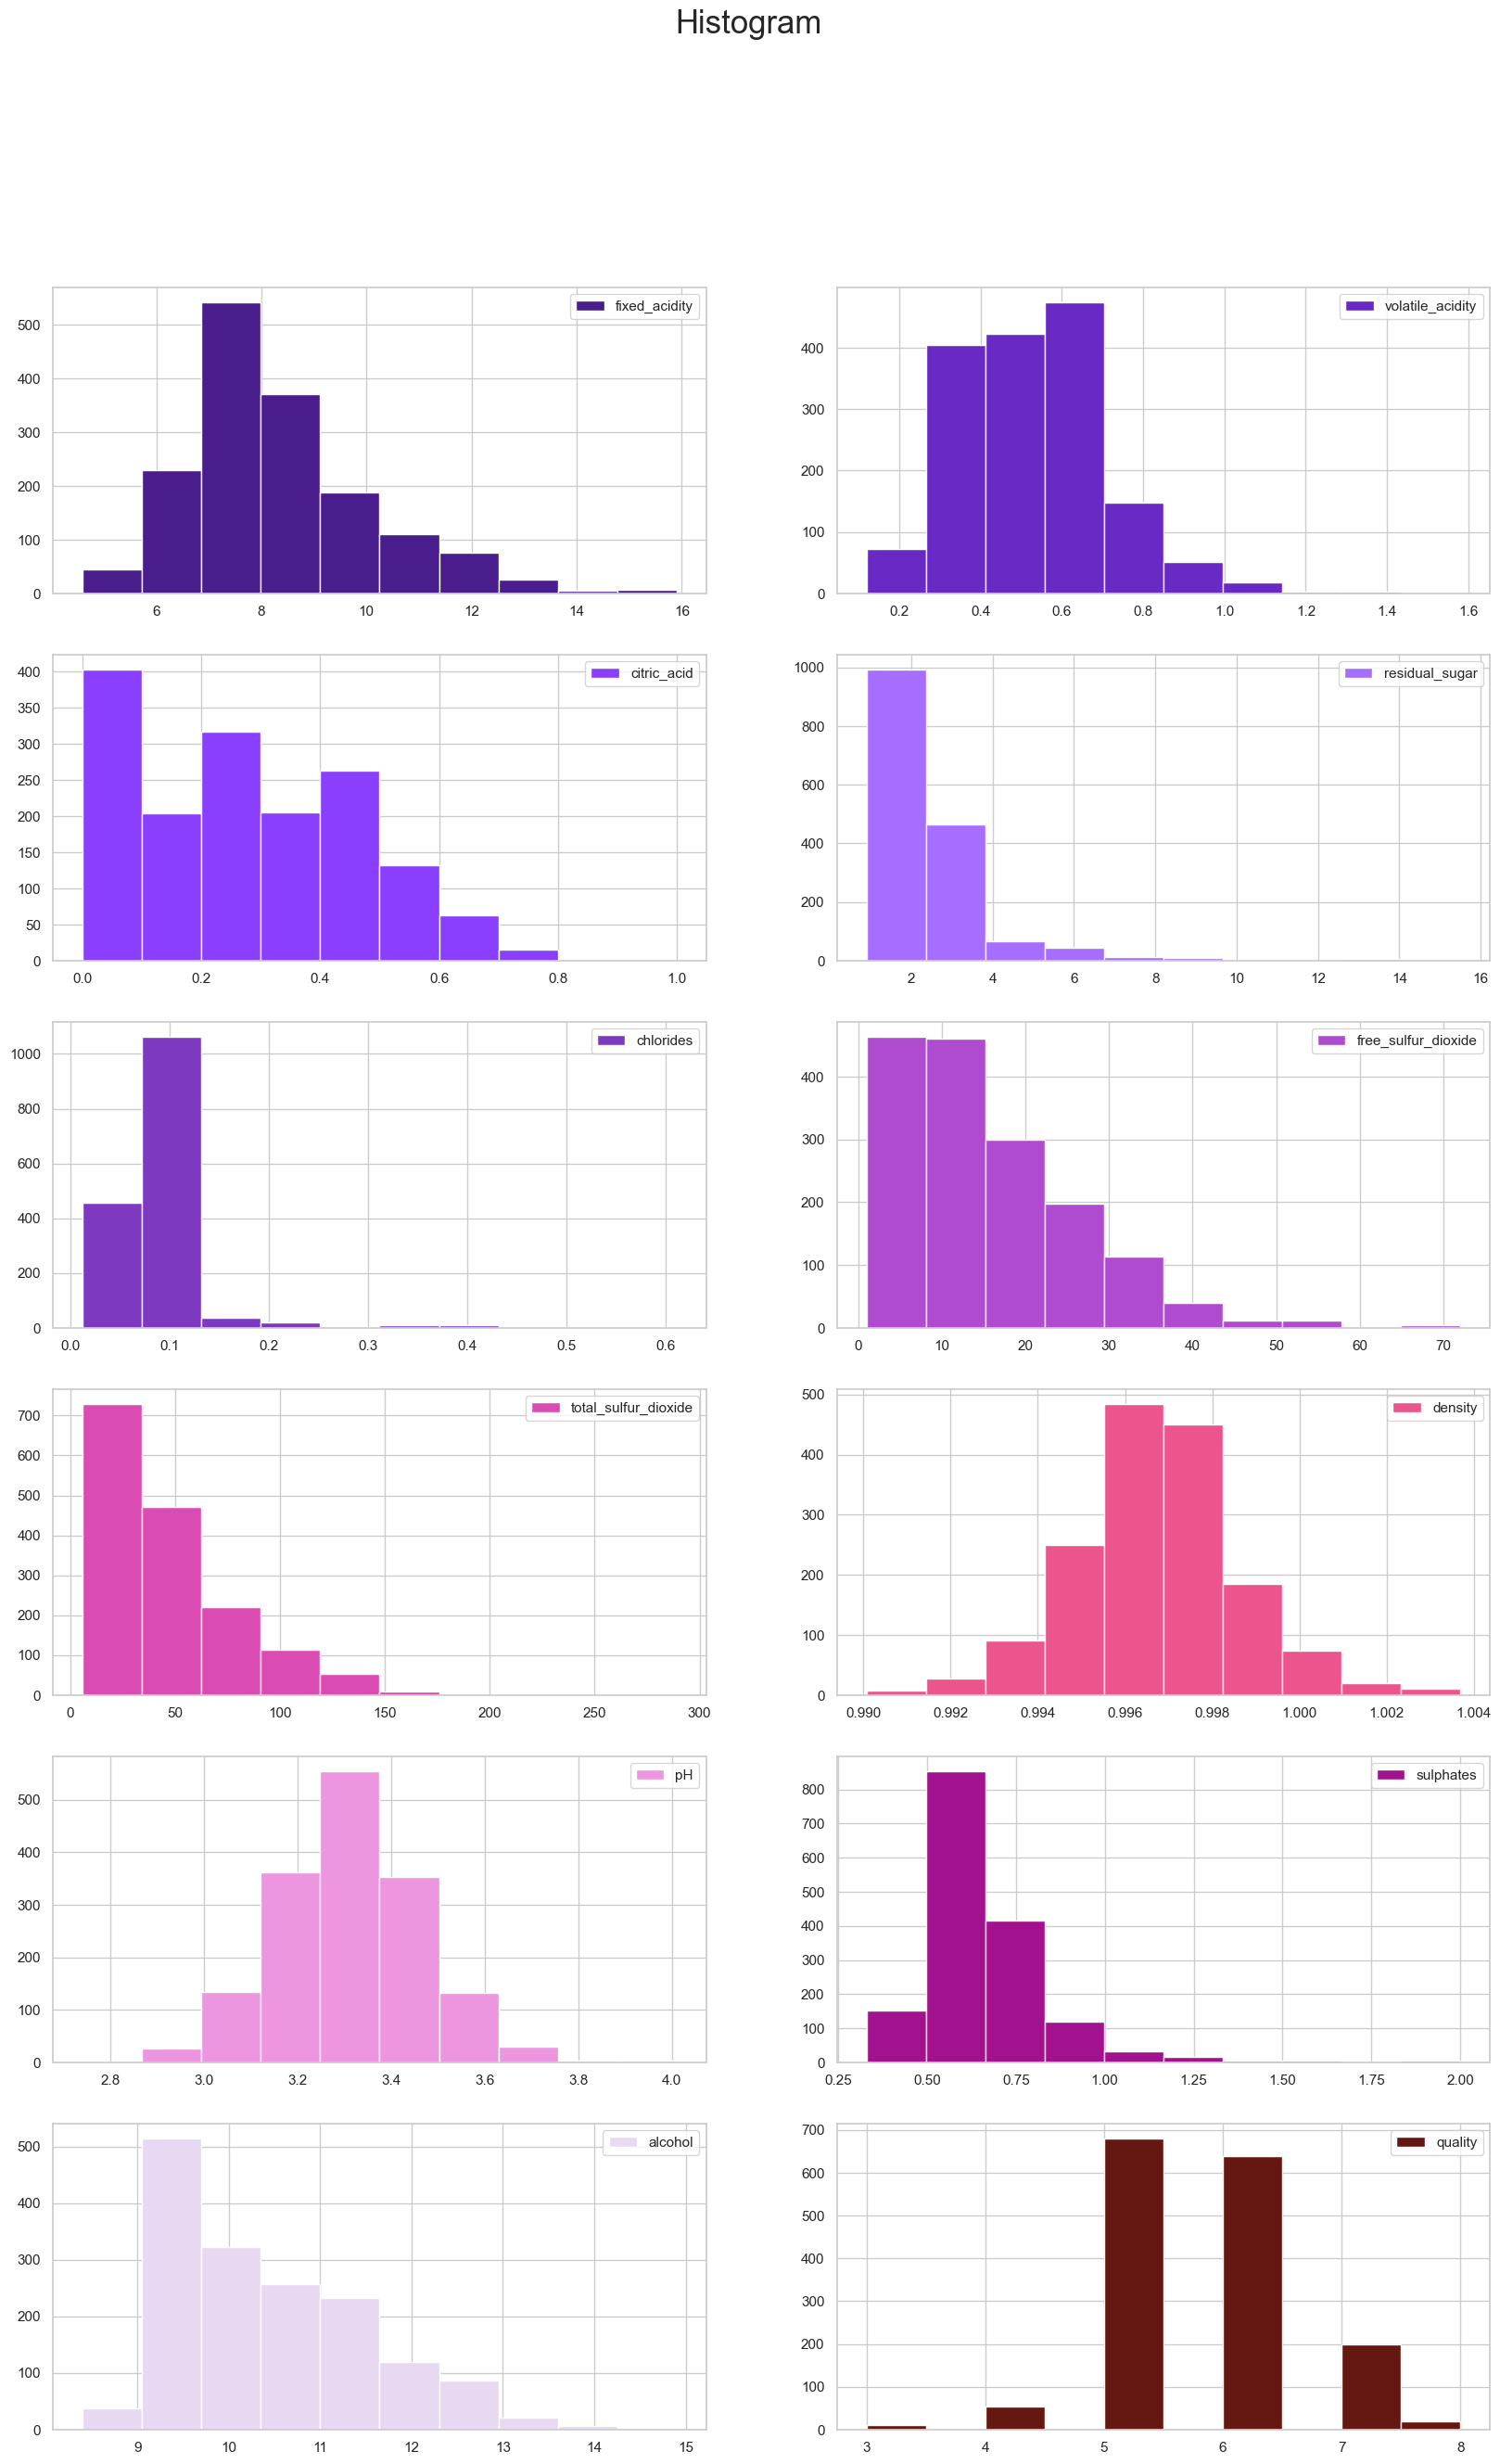

In [108]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize=(20,30))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index , column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
    plt.suptitle("Histogram",size = 25)

plt.show()


# This code snippet creates a series of histograms for each column in the DataFrame df and arranges them in a grid layout. 
# The histograms help visualize the distribution of values within each column.


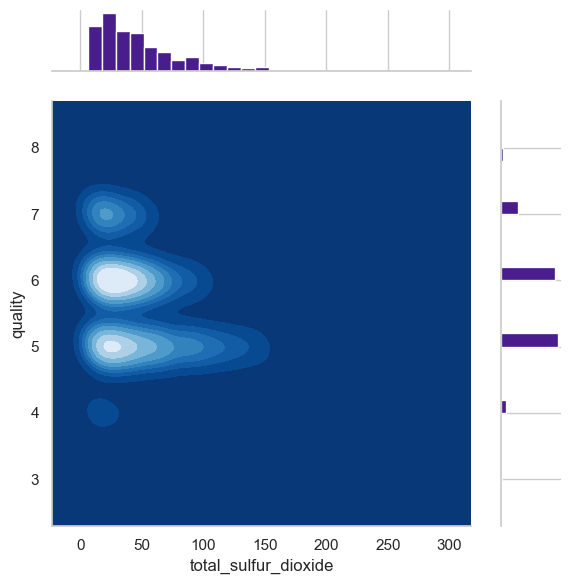

In [109]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df,  x = "total_sulfur_dioxide", y = "quality", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Blues_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25);

# This code snippet uses Seaborn to create a joint distribution plot that visualizes the relationship between 
# total_sulfur_dioxide and quality in the DataFrame df. The plot includes both a kernel density estimate (KDE) and histograms.

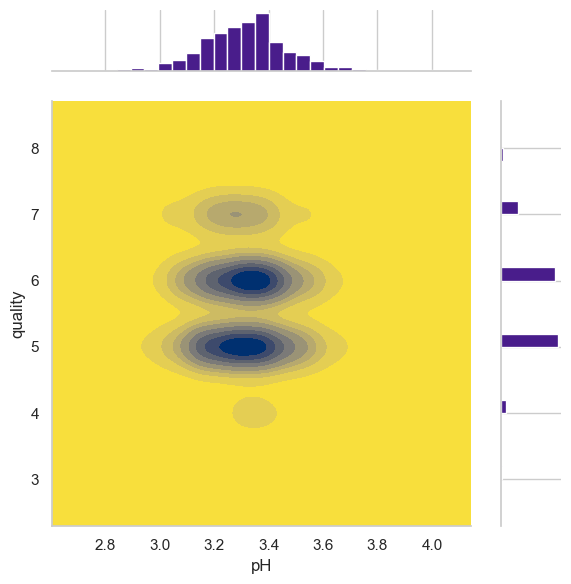

In [110]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df, x = "pH", y = "quality", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh= 0, cmap =  "cividis_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25)


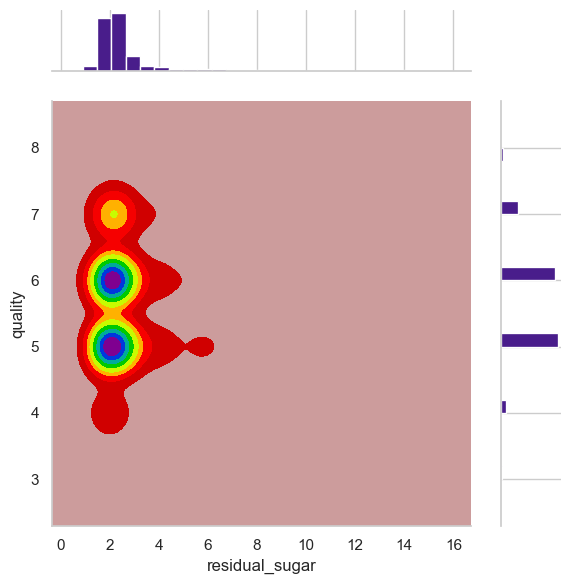

In [111]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df, x = "residual_sugar", y = "quality", space = 0.5 )
g.plot_joint(sns.kdeplot, fill = True, thresh = 0 , cmap = "nipy_spectral_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25)

<Axes: xlabel='citric_acid', ylabel='alcohol'>

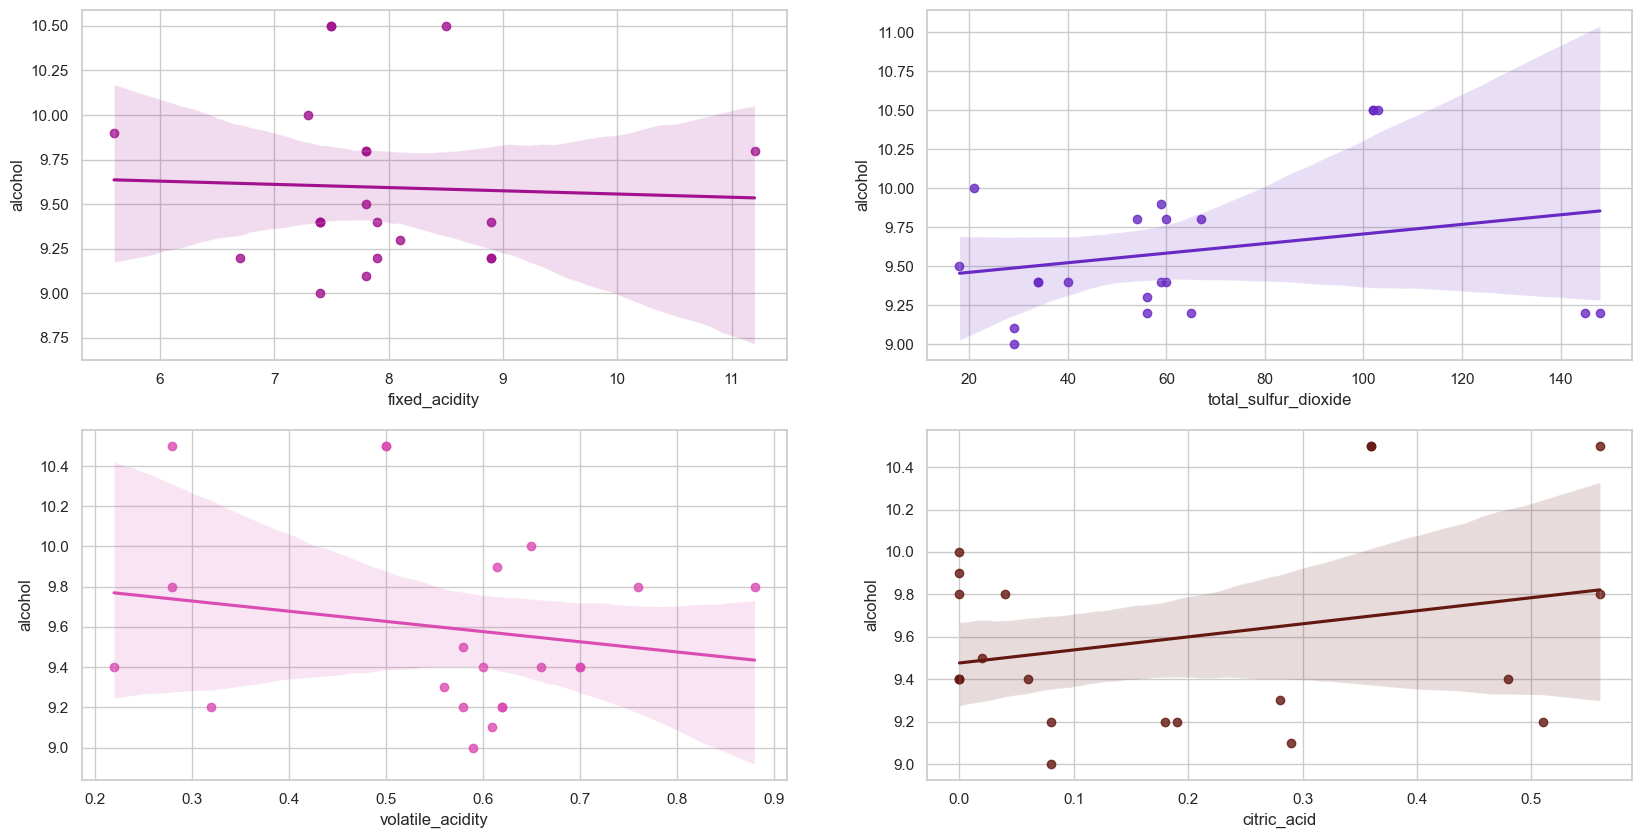

In [191]:
fig , axes = plt.subplots(2,2, figsize = (20,10))

axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed_acidity", y = "alcohol", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "total_sulfur_dioxide", y = "alcohol", data = df, color = "#6929C4")
sns.regplot(ax = axes[2], x= "volatile_acidity", y = "alcohol", data = df, color = "#DB4CB2")
sns.regplot(ax = axes[3], x= "citric_acid", y = "alcohol", data =df, color = "#641811")


# This code generates a grid of four regression plots, each showing the relationship between a different feature 
# (fixed acidity, total sulfur dioxide, volatile acidity, and citric acid) and the alcohol content in the DataFrame df.
# Each plot includes a scatter plot of the data points and a fitted regression line, helping to visualize any linear relationships between the features and alcohol content. 

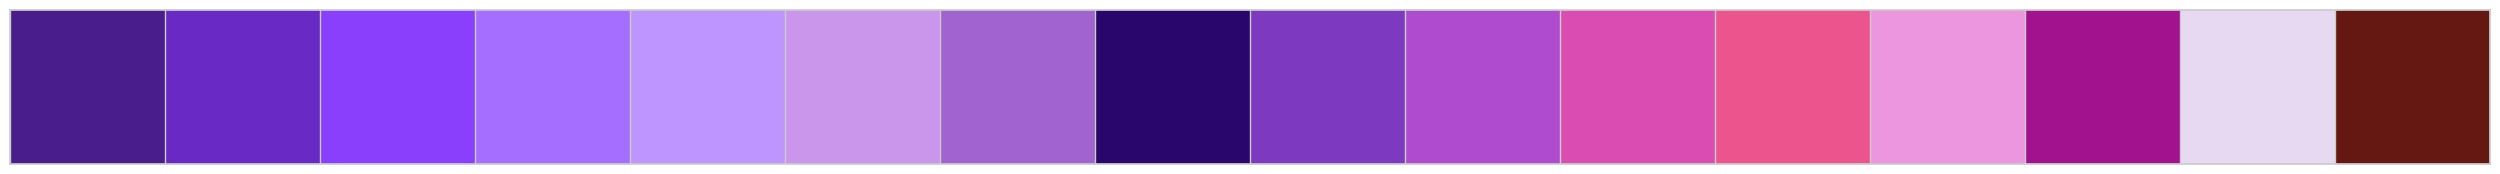

In [113]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple , size = 2)

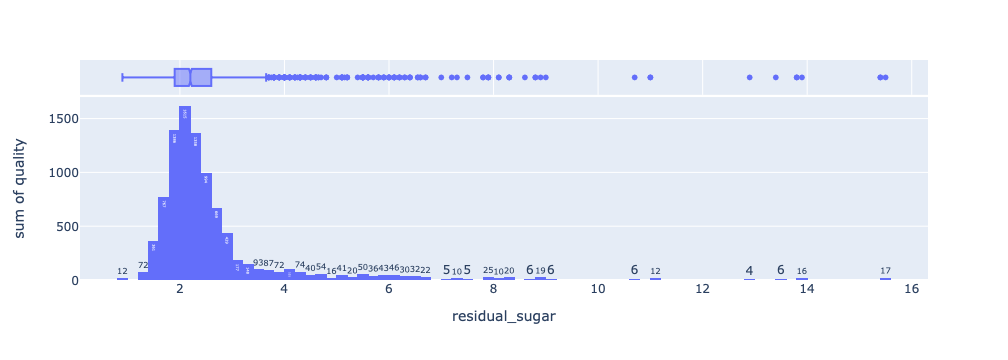

In [114]:
fig = px.histogram(df ,x = "residual_sugar", y = "quality", marginal = "box", color = None,
                  text_auto = True, hover_data = df.columns)

fig.show()

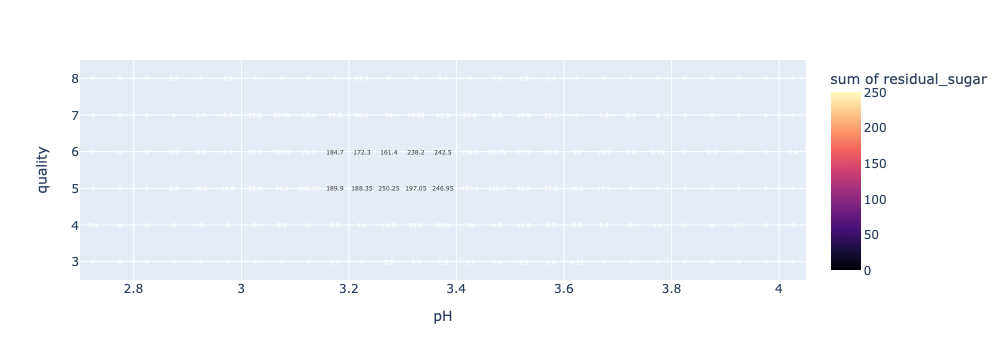

In [115]:
fig = px.density_heatmap(df, x= "pH", y = "quality", z= "residual_sugar", color_continuous_scale = "magma"
                        ,text_auto = True)
fig.show()

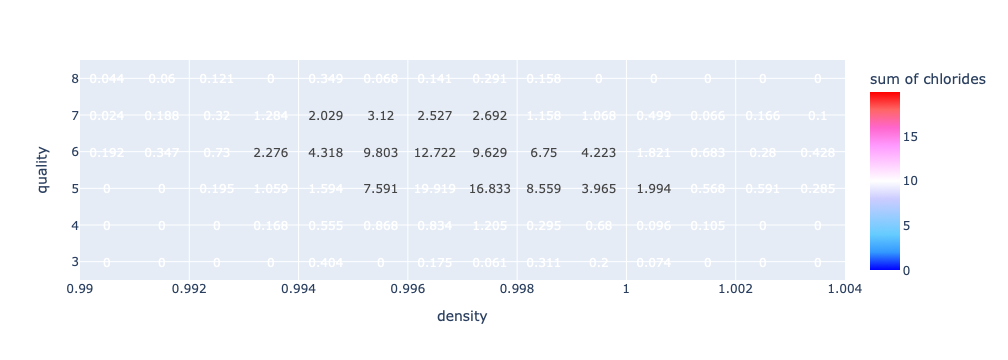

In [116]:
fig = px.density_heatmap(df, x= "density", y = "quality", z= "chlorides", color_continuous_scale = "picnic",
                        text_auto = True)

fig.show()

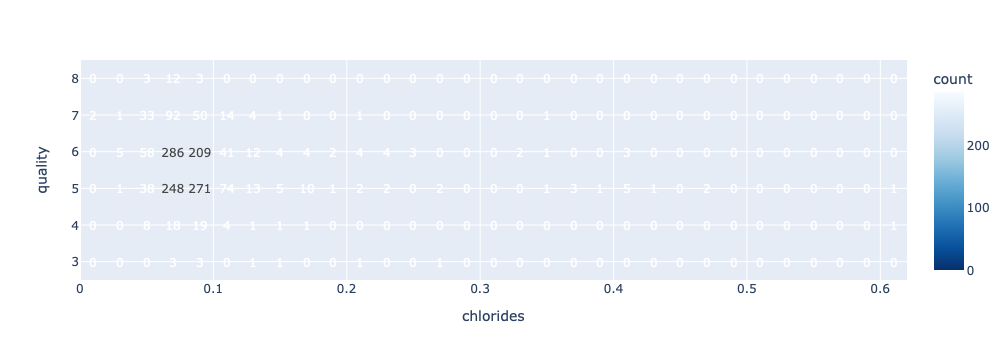

In [117]:
fig = px.density_heatmap(df, x= "chlorides", y = "quality", color_continuous_scale = "blues_r",
                        text_auto = True)
fig.show()

<Axes: >

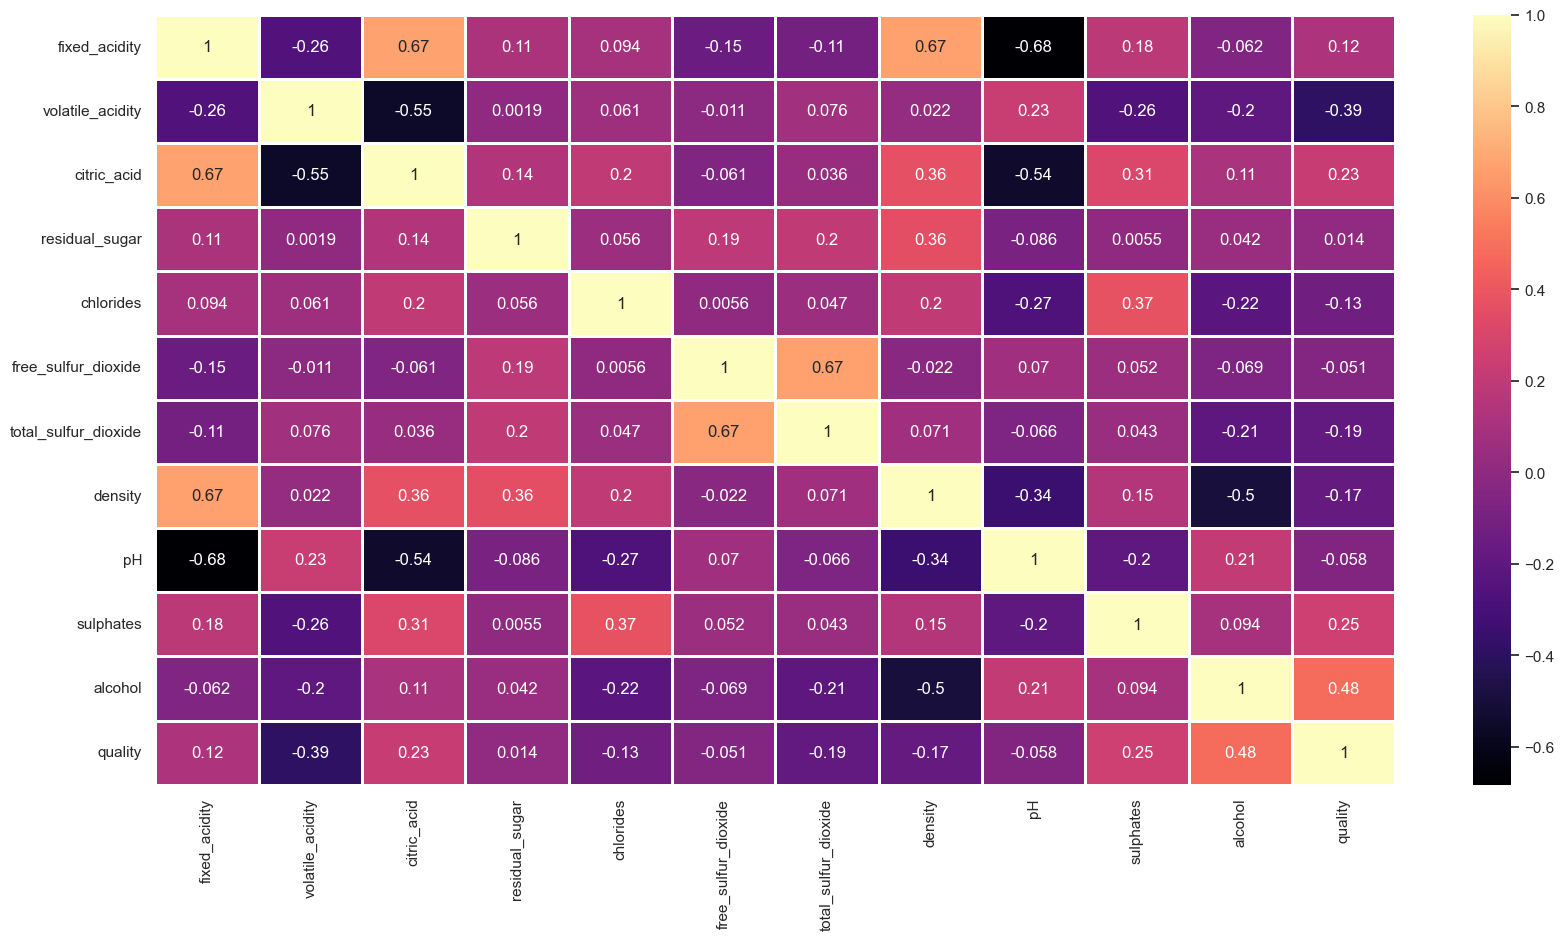

In [118]:
plt.figure(figsize = [20,10], facecolor = "white")
sns.heatmap(df. corr(), annot = True, linewidths = 2, cmap = "magma")

# This code snippet generates a heatmap to visualize the correlation matrix of the DataFrame df. 
# The heatmap provides an easy way to understand the relationships between different features in the dataset.



In [119]:
list = (df[["alcohol", "density"]].corr(), df[["pH", "citric_acid"]].corr(), df[["pH","fixed_acidity"]].corr(), df[["density", "alcohol"]].corr(),
        df[["citric_acid", "volatile_acidity"]].corr())

for corr in list: 
    print(corr , "\n \n")

# This code snippet calculates the correlation matrices for specific pairs of features in the DataFrame df and prints them. 
# Each correlation matrix shows the relationship between two features.

         alcohol  density
alcohol  1.00000 -0.49618
density -0.49618  1.00000 
 

                   pH  citric_acid
pH           1.000000    -0.541904
citric_acid -0.541904     1.000000 
 

                     pH  fixed_acidity
pH             1.000000      -0.682978
fixed_acidity -0.682978       1.000000 
 

         density  alcohol
density  1.00000 -0.49618
alcohol -0.49618  1.00000 
 

                  citric_acid  volatile_acidity
citric_acid          1.000000         -0.552496
volatile_acidity    -0.552496          1.000000 
 



In [120]:
print ("Pearson Correlatoin Coefficient: ", st.pearsonr(df["alcohol"], df["density"]))

Pearson Correlatoin Coefficient:  PearsonRResult(statistic=-0.49617977024170373, pvalue=3.938835339979865e-100)


In [121]:
print("Pearson Correlation Coefficient:", st.pearsonr(df ["pH"], df["citric_acid"]))

Pearson Correlation Coefficient: PearsonRResult(statistic=-0.54190414473951, pvalue=1.0072013259112187e-122)


In [122]:
print("Pearson Correlation Coefficient:", st.pearsonr(df ["pH"], df["fixed_acidity"]))

Pearson Correlation Coefficient: PearsonRResult(statistic=-0.6829781945685304, pvalue=4.063034039851236e-220)


In [123]:
print("Pearson Correlation Coefficient:", st.pearsonr(df ["free_sulfur_dioxide"], df["total_sulfur_dioxide"]))

Pearson Correlation Coefficient: PearsonRResult(statistic=0.6676664504810211, pvalue=6.404722954686227e-207)


In [124]:
print("\nPROCESSING DATASET")


PROCESSING DATASET


In [125]:
df.head(n =25).style.background_gradient(cmap = "Purples_r")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [126]:
df["quality"]= np.where(df["quality"]> 5,1,0)

print(df["quality"])

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [127]:
df.head(n = 25).style.background_gradient(cmap = "Reds")

# This code snippet is applied to a DataFrame df to display the first 25 rows with a styled background gradient. 
# Specifically, it sets the background color of the DataFrame cells using a gradient from light to dark red ("Reds" colormap). 
# This makes it visually easier to identify patterns or trends in the data at a glance.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,0
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,0
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,1
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,1
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,0


In [128]:
y = df["quality"]

x = df.drop("quality", axis = 1)

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size = 0.5,
                                                   shuffle = True,
                                                   random_state = 1)

# This code snippet splits the dataset into training and testing sets for both features (x) and labels (y). 
# It allocates 50% of the data to the testing set (test_size = 0.5), shuffles the data before splitting (shuffle = True), and sets the random seed to ensure reproducibility (random_state = 1).

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# This code normalizes features to a range of 0 to 1 using MinMaxScaler, applied separately to training and testing sets.

In [132]:
print(x_train[0:5])
print("\n")
print(x_train.shape)

[[0.37168142 0.36986301 0.33333333 0.06153846 0.13626374 0.04615385
  0.0625     0.53746177 0.25217391 0.24848485 0.12307692]
 [0.7079646  0.18493151 0.62820513 0.12307692 0.14945055 0.10769231
  0.05147059 0.69801223 0.1826087  0.2969697  0.29230769]
 [0.47787611 0.21232877 0.42307692 0.13846154 0.18241758 0.41538462
  0.30514706 0.63685015 0.31304348 0.21212121 0.24615385]
 [0.20353982 0.19178082 0.30769231 0.12307692 0.15604396 0.44615385
  0.14338235 0.44571865 0.34782609 0.15151515 0.24615385]
 [0.32743363 0.36643836 0.15384615 0.10769231 0.15604396 0.21538462
  0.39338235 0.49923547 0.26956522 0.2        0.21538462]]


(799, 11)


In [133]:
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.37168142 0.19863014 0.82051282 0.1        0.17802198 0.12307692
  0.13235294 0.65214067 0.59130435 0.2        0.32307692]
 [0.36283186 0.34931507 0.35897436 0.13846154 0.18461538 0.24615385
  0.23161765 0.5558104  0.34782609 0.18181818 0.27692308]
 [0.51327434 0.15068493 0.74358974 0.21538462 0.35604396 0.07692308
  0.03676471 0.52981651 0.28695652 0.22424242 0.44615385]
 [0.22123894 0.23287671 0.25641026 0.07692308 0.14285714 0.41538462
  0.17647059 0.42278287 0.44347826 0.18787879 0.30769231]
 [0.22123894 0.18493151 0.15384615 0.09230769 0.11648352 0.2
  0.06617647 0.18730887 0.3826087  0.12121212 0.75384615]]


(800, 11)


In [134]:
print(y_train[0:5])
print("\n")
print("-------------------------------------")
print(y_train.shape)

50      0
1224    1
1128    0
670     0
32      0
Name: quality, dtype: int64


-------------------------------------
(799,)


In [135]:
print(y_test[0:5])
print("\n")
print("--------------------------------------")
print(y_train.shape)

75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int64


--------------------------------------
(799,)


In [136]:
print("Using K Classifier for the classification")

Using K Classifier for the classification


In [137]:
kNN = KNeighborsClassifier()

In [138]:
kNN_params = {"n_neighbors" : np.arange(2,50),
            "weights": ["uniform" , "distance"],
"leaf_size" :[25,30,25]}


knn_cv_model = GridSearchCV(kNN, kNN_params, cv =10)
knn_cv_model.fit(x_train, y_train)

# This code snippet performs hyperparameter tuning for kNN (k-nearest neighbors) using GridSearchCV with specified parameters and cross-validation.


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [139]:
print(knn_cv_model.best_params_)
print(knn_cv_model.best_score_)

# This code prints the best hyperparameters found by GridSearchCV (best_params_) and the corresponding best cross-validation score (best_score_).

{'leaf_size': 25, 'n_neighbors': 17, 'weights': 'distance'}
0.7834968354430379


In [140]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
leaf_size = knn_cv_model.best_params_["leaf_size"],
weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train,y_train )

# This code initializes a kNN classifier with the best hyperparameters found through GridSearchCV and fits it to the training data.

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='distance')

In [141]:
print(knn_model.leaf_size)

25


In [142]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.765

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       375
           1       0.77      0.80      0.78       425

    accuracy                           0.77       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.77      0.76       800



In [144]:
gbm =GradientBoostingClassifier()

In [150]:
gbm_params = {"learning_rate":[0.005, 0.008, 0.1, 0.15],
             "n_estimators":[80,100, 150, 200],
             "max_depth":[2,3,4],
             "min_samples_split":[2,3,4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params,cv = 10 , n_jobs = -1)
gbm_cv_model.fit(x_train, y_train)
# This code snippet performs hyperparameter tuning for Gradient Boosting Machine (GBM) using GridSearchCV with specified parameters. 
# It searches over learning rate, number of estimators, max depth, and min samples split.

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [151]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

Best score for train set: 0.7885601265822786


In [152]:
print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

best learning_rate value: 0.15 
best n_estimators value: 200 
best max_depth value: 2 
best min_samples_split value: 3


In [156]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                               max_depth = gbm_cv_model.best_params_["max_depth"],
                               n_estimators = gbm_cv_model.best_params_["n_estimators"],
                               min_samples_split = gbm_cv_model.best_params_["min_samples_split"])

gbm_model = gbm.fit(x_train,y_train)

# This code initializes a Gradient Boosting Classifier with the best hyperparameters found through GridSearchCV and fits it to the training data.

In [157]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.76125

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       375
           1       0.77      0.78      0.78       425

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



In [173]:
 lgbm = LGBMClassifier()

In [184]:
lgbm_params = {"n_estimators": [80,100, 150, 200],
              "max_depth": [2],
              "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
              "min_child_samples": [2,3,4]}

lgbm.fit(x_train, y_train)

lgbm_acc = accuracy_score(y_test, lgbm.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, lgbm.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {lgbm_acc} \n")

lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 10 , n_jobs = -1)
lgbm_cv_model.fit(x_train, y_train)

# This code first fits a LightGBM classifier (`lgbm`) to the training data. Then, it evaluates its accuracy on both training and testing sets. 
# Later, it performs hyperparameter tuning for LightGBM using GridSearchCV with specified parameters.

[LightGBM] [Info] Number of positive: 430, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538173 -> initscore=0.152989
[LightGBM] [Info] Start training from score 0.152989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=None, num_leaves=31,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15, 0.18],
                         'max_depth': [2], 'min_child_samples': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("____________________________________________")

print("best learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.7935284810126583
____________________________________________
best learning_rate value: 0.18 
best n_estimators value: 150 
best max_depth value: 2 
best min_child_samples value: 3


In [186]:
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                      max_depth = lgbm_cv_model.best_params_["max_depth"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"])
lgbm_model = lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 430, number of negative: 369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538173 -> initscore=0.152989
[LightGBM] [Info] Start training from score 0.152989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [187]:
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7475

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       375
           1       0.76      0.77      0.76       425

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



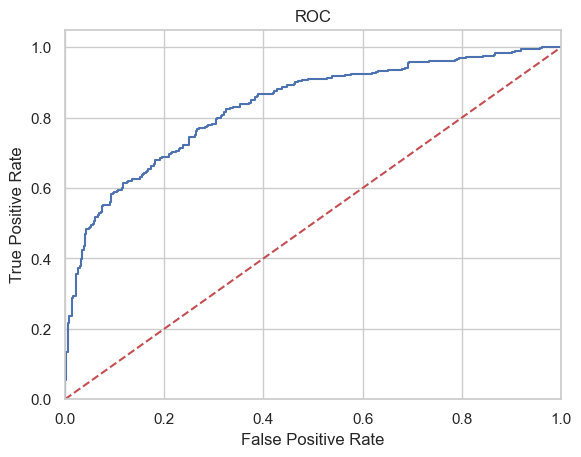

In [189]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, lgbm_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# This code calculates and prints the training and test accuracy of a LightGBM classifier. 
# Then, it performs hyperparameter tuning for LightGBM using GridSearchCV.


In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [170]:
dtc_accuracy = accuracy_score(y_test, dtc.predict(x_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Accuracy Score of Training Data is {dtc_accuracy}\n")


Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.74375



The 'Quality' attribute majorly depends on Component 1 with an explained variance ratio of 0.97
Attributes contributing the most to the first principal component:
total_sulfur_dioxide: 0.957
free_sulfur_dioxide: 0.289
residual_sugar: 0.020
fixed_acidity: 0.009
alcohol: 0.003
citric_acid: 0.002
sulphates: 0.002
pH: -0.001
volatile_acidity: -0.001
chlorides: 0.000
density: 0.000


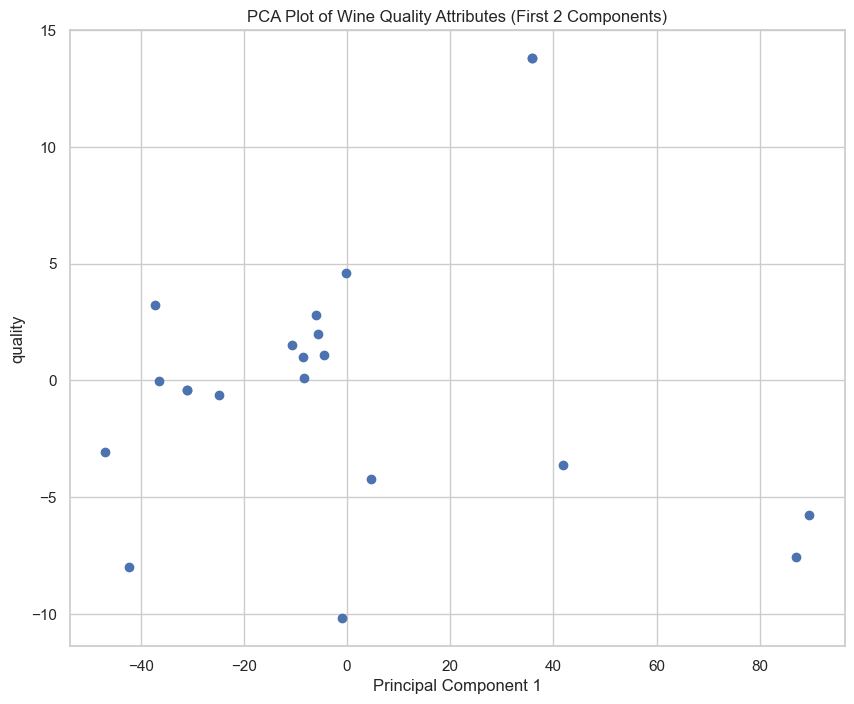

In [190]:
data = {'fixed_acidity': [7.4,
7.8,
7.8,
11.2,
7.4,
7.4,
7.9,
7.3,
7.8,
7.5,
6.7,
7.5,
5.6,
7.8,
8.9,
8.9,
8.5,
8.1,
7.4,
7.9,
8.9],
        'volatile_acidity': [0.7,
0.88,
0.76,
0.28,
0.7,
0.66,
0.6,
0.65,
0.58,
0.5,
0.58,
0.5,
0.615,
0.61,
0.62,
0.62,
0.28,
0.56,
0.59,
0.32,
0.22],
        'citric_acid': [0.0,
0.0,
0.04,
0.56,
0.0,
0.0,
0.06,
0.0,
0.02,
0.36,
0.08,
0.36,
0.0,
0.29,
0.18,
0.19,
0.56,
0.28,
0.08,
0.51,
0.48],
        'residual_sugar': [1.9,
2.6,
2.3,
1.9,
1.9,
1.8,
1.6,
1.2,
2.0,
6.1,
1.8,
6.1,
1.6,
1.6,
3.8,
3.9,
1.8,
1.7,
4.4,
1.8,
1.8],
        'free_sulfur_dioxide': [11.0,
25.0,
15.0,
17.0,
11.0,
13.0,
15.0,
15.0,
9.0,
17.0,
15.0,
17.0,
16.0,
9.0,
52.0,
51.0,
35.0,
16.0,
6.0,
17.0,
29.0],
        'chlorides': [0.076,
0.098,
0.092,
0.075,
0.076,
0.075,
0.069,
0.065,
0.073,
0.071,
0.09700000000000000,
0.071,
0.08900000000000000,
0.114,
0.17600000000000000,
0.17,
0.092,
0.368,
0.086,
0.341,
0.077],
        'free_sulfur_dioxide': [11.0,
25.0,
15.0,
17.0,
11.0,
13.0,
15.0,
15.0,
9.0,
17.0,
15.0,
17.0,
16.0,
9.0,
52.0,
51.0,
35.0,
16.0,
6.0,
17.0,
29.0],
        'total_sulfur_dioxide': [34.0,
67.0,
54.0,
60.0,
34.0,
40.0,
59.0,
21.0,
18.0,
102.0,
65.0,
102.0,
59.0,
29.0,
145.0,
148.0,
103.0,
56.0,
29.0,
56.0,
60.0],
        'density': [0.9978,
0.9968,
0.997,
0.998,
0.9978,
0.9978,
0.9964,
0.9946,
0.9968,
0.9978,
0.9959,
0.9978,
0.9943,
0.9974,
0.9986,
0.9986,
0.9969,
0.9968,
0.9974,
0.9969,
0.9968],
        'pH': [3.51,
3.2,
3.26,
3.16,
3.51,
3.51,
3.3,
3.39,
3.36,
3.35,
3.28,
3.35,
3.58,
3.26,
3.16,
3.17,
3.3,
3.11,
3.38,
3.04,
3.39],
        'sulphates': [0.56,
0.68,
0.65,
0.58,
0.56,
0.56,
0.46,
0.47,
0.57,
0.8,
0.54,
0.8,
0.52,
1.56,
0.88,
0.93,
0.75,
1.28,
0.5,
1.08,
0.53],
        'alcohol': [9.4,
9.8,
9.8,
9.8,
9.4,
9.4,
9.4,
10.0,
9.5,
10.5,
9.2,
10.5,
9.9,
9.1,
9.2,
9.2,
10.5,
9.3,
9.0,
9.2,
9.4],
        'quality': [5,
5,
5,
6,
5,
5,
5,
7,
7,
5,
5,
5,
5,
5,
5,
5,
7,
5,
4,
6,
6]}

df = pd.DataFrame(data)

# pca =PCA (n_components = min(df.shape), solver = "arpack")
pca = PCA(n_components= 2)
pca.fit(df.drop('quality', axis=1))
df_transformed = pca.transform(df.drop('quality', axis=1))

explained_variance_ratio = pca.explained_variance_ratio_
major_component_index = np.argmax(explained_variance_ratio) + 1
print(f"The 'Quality' attribute majorly depends on Component {major_component_index} "
      f"with an explained variance ratio of {explained_variance_ratio[major_component_index - 1]:.2f}")

first_component = pca.components_[0]

attributes = df.drop('quality', axis=1).columns
contributions = dict(zip(attributes, first_component))

# Sort attributes by their contributions to the first principal component
sorted_contributions = sorted(contributions.items(), key=lambda x: abs(x[1]), reverse=True)

print("Attributes contributing the most to the first principal component:")
for attribute, contribution in sorted_contributions:
    print(f"{attribute}: {contribution:.3f}")


plt.figure(figsize=(10, 8))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1])  # Using the first 2 components
plt.xlabel('Principal Component 1')
plt.ylabel('quality')
plt.title('PCA Plot of Wine Quality Attributes (First 2 Components)')
plt.grid(True)
plt.show()


# This code snippet performs PCA (Principal Component Analysis) on a DataFrame df excluding the 'quality' column. 
# It identifies the components explaining variance, attributes contributing most to the first component, and visualizes data in a 2D scatter plot.